# Git in DataFrames

python + git + dataframe = [git-pandas](http://wdm0006.github.io/git-pandas/)

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%matplotlib inline

## Repository

In [3]:
from gitpandas import Repository

tries = [".", "../..", "../../.."]
err = None
for t in tries:
    try:
        repo = Repository(working_dir=t, verbose=True)
        err = None
        break
    except Exception as e:
        err = e
        continue
if err is not None:
    import os
    raise Exception("issue in current folder '{0}'".format(os.getcwd())) from err

Repository [pyquickhelper] instantiated at directory: ../..


In [4]:
repo.branches()

,branch,local,repository
0,master,True,pyquickhelper
1,master,False,pyquickhelper


One funny function. No idea if that gives a good estimation.

In [5]:
try:
    use = repo.hours_estimate()
except Exception as e:
    # Not always reliable.
    print(e)
    use = None
use

c:\python372_x64\lib\site-packages\gitpandas\repository.py:461: UserWarning: Warning, extensions and ignore_dir will be deprecated in v2.0.0, please use ignore_globs instead
  warnings.warn('Warning, extensions and ignore_dir will be deprecated in v2.0.0, please use ignore_globs instead')


,committer,hours
0,sdpython,107.178611
1,GitHub,0.000000
2,Ensaegithubxd,0.000000
3,dupre,515.906667
4,xavier dupré,735.555833
5,azure provisioned user,2.483333
6,abotlegacy,0.000000
7,ped4747,0.000000


In [6]:
if use is not None:
    workdays = use.hours.sum() / 8
else:
    workdays = None
workdays

170.14055555555547

Not sure what this number reflects.

## Logs

The following cane take some time depending on you repository size.

In [7]:
try:
    hist = repo.commit_history()
except Exception as e:
    # Not always reliable.
    print(e)
    import pandas
    hist = pandas.DataFrame()
hist.head()

c:\python372_x64\lib\site-packages\gitpandas\repository.py:461: UserWarning: Warning, extensions and ignore_dir will be deprecated in v2.0.0, please use ignore_globs instead
  warnings.warn('Warning, extensions and ignore_dir will be deprecated in v2.0.0, please use ignore_globs instead')


,author,committer,message,lines,insertions,deletions,net
date,,,,,,,
2020-02-20 00:34:22,xavier dupré,xavier dupré,Update notebook_runner.py\n,2,1,1,0
2020-02-20 00:26:08,xavier dupré,xavier dupré,Update config.yml\n,2,1,1,0
2020-02-20 00:14:36,xavier dupré,xavier dupré,Fix bug introduced by previous commit\n,2,1,1,0
2020-02-19 23:57:00,xavier dupré,xavier dupré,removes some specific code added for older ver...,48,25,23,2
2020-02-19 19:57:55,xavier dupré,xavier dupré,"Fixes #292, add command to run notebook\n",91,83,8,75


In [8]:
try:
    histf = repo.file_change_history()
except Exception as e:
    # Not always reliable.
    print(e)
    import pandas
    histf = pandas.DataFrame(dict(filename=[""]))
histf.head()

c:\python372_x64\lib\site-packages\gitpandas\repository.py:461: UserWarning: Warning, extensions and ignore_dir will be deprecated in v2.0.0, please use ignore_globs instead
  warnings.warn('Warning, extensions and ignore_dir will be deprecated in v2.0.0, please use ignore_globs instead')


,author,committer,message,rev,filename,insertions,deletions
date,,,,,,,
2020-02-20 00:34:22,xavier dupré,xavier dupré,Update notebook_runner.py\n,f852c6e373613a8ad04a2cce36f472e6271d4f9c,src/pyquickhelper/ipythonhelper/notebook_runne...,1,1
2020-02-20 00:26:08,xavier dupré,xavier dupré,Update config.yml\n,6f656a84e49f909dbc16a863e4ee33991a30dbe2,.circleci/config.yml,1,1
2020-02-20 00:14:36,xavier dupré,xavier dupré,Fix bug introduced by previous commit\n,ca20e6763fe4b65172b9280de7162cb3dc8506b3,src/pyquickhelper/ipythonhelper/notebook_runne...,1,1
2020-02-19 23:57:00,xavier dupré,xavier dupré,removes some specific code added for older ver...,b6bbb285fb7327d96a7e27987b9781d6deabac60,_unittests/ut_cli/test_cli_notebook.py,9,2
2020-02-19 23:57:00,xavier dupré,xavier dupré,removes some specific code added for older ver...,b6bbb285fb7327d96a7e27987b9781d6deabac60,setup.py,11,4


In [9]:
histf.tail()

,author,committer,message,rev,filename,insertions,deletions
date,,,,,,,
2013-12-28 02:32:34,sdpython,sdpython,"first version, doc, unit test, setup\n",b94d02d8e4bc124e7203c936cdde9570b8392d59,src/pyquickhelper/sync/file_tree_node.py,399,0
2013-12-28 02:32:34,sdpython,sdpython,"first version, doc, unit test, setup\n",b94d02d8e4bc124e7203c936cdde9570b8392d59,src/pyquickhelper/sync/synchelper.py,256,0
2013-12-28 02:32:34,sdpython,sdpython,"first version, doc, unit test, setup\n",b94d02d8e4bc124e7203c936cdde9570b8392d59,src/pyquickhelper/unittests/__init__.py,0,0
2013-12-28 02:32:34,sdpython,sdpython,"first version, doc, unit test, setup\n",b94d02d8e4bc124e7203c936cdde9570b8392d59,src/pyquickhelper/unittests/utils_tests.py,280,0
2013-12-28 02:32:34,sdpython,sdpython,"first version, doc, unit test, setup\n",b94d02d8e4bc124e7203c936cdde9570b8392d59,src/version.txt,1,0


## Check removed files

In [10]:
unique = set(histf.filename)
len(unique)

1199

In [11]:
import os
sorted_unique = list(sorted(unique))
full_path = [os.path.join(repo.repo.working_dir, _) for _ in sorted_unique]

In [12]:
import numpy
exists = [os.path.exists(f) for f in full_path]
sizes = [os.stat(f).st_size if os.path.exists(f) else numpy.nan for f in full_path]

In [13]:
import pandas
removed = pandas.DataFrame(dict(name=sorted_unique, exists=exists, size=sizes))
removed.sort_values("size").dropna().tail()

,name,exists,size
339,_unittests/ut_helpgen/notebooks_slides/js_boke...,True,424724.0
1084,src/pyquickhelper/sphinxext/revealjs/templates...,True,476557.0
579,_unittests/ut_pycode/data/coverage/coverage_re...,True,507382.0
677,_unittests/ut_sphinxext/data/video/mur.mp4,True,625634.0
260,_unittests/ut_helpgen/data/completion_profilin...,True,1402712.0


How many files not exist anymore?

In [14]:
removed[~removed.exists].shape

(261, 3)

In [15]:
removed[~removed.exists].head()

,name,exists,size
0,"""_unittests/ut_sync/data/bug/bugged/Pr\303\251...",False,NaN
1,"""_unittests/ut_sync/data/bug/bugged/Pr\303\251...",False,NaN
2,.circle.yml,False,NaN
3,.circle.yml => circle.yml,False,NaN
5,.coveragerc,False,NaN


In [16]:
g = repo.repo.git()

In [17]:
print(g.execute('git log --log-size --abbrev --follow "build_script.bat"').replace(
    '@gmail.com', '@').replace("@ensae.fr", "@"))

commit 561c3bbe2e0eb9223a25949187a61645c213bb87
log size 139
Author: xavier dupré <xavier.dupre@>
Date:   Thu Apr 25 11:19:36 2019 +0200

    Fixes #246, support projects with no src folder

commit a8db6b4b0a2e38f774300acabb2ab46b9677a981
log size 142
Author: xavier dupré <xavier.dupre@>
Date:   Mon Mar 25 12:31:53 2019 +0100

    fixes missing names, skip lines marked with # noqa

commit 7b34578848f96fea15c1fc96c1cece354f87ba90
log size 115
Author: xavier dupré <xavier.dupre@>
Date:   Sun Jul 22 12:36:29 2018 +0200

    update build_script.bat

commit 27b203dd00658808925ab0ed24e91e7f34609254
log size 122
Author: xavier dupré <xavier.dupre@>
Date:   Thu May 17 00:45:25 2018 +0200

    documentation, setup, circleci

commit 56950d8a1d41163c72e8cb7f1aac45dc2d4e5789
log size 112
Author: xavier dupré <xavier.dupre@>
Date:   Mon Jan 8 13:22:00 2018 +0100

    fix failing unit test

commit 69c1a226c2f5724102ca2e5f22a1d6a126e701be
log size 104
Author: xavier dupré <xavier.dupre@>
Date:   Fri 

In [18]:
from pyquickhelper.loghelper.repositories.pygit_helper import get_repo_log
res = get_repo_log(repo.repo.working_dir)
res[0]

['xavier dupré',
 'f852c6e3',
 datetime.datetime(2020, 2, 20, 0, 0),
 'Update notebook_runner.py',
 'f852c6e373613a8ad04a2cce36f472e6271d4f9c',
 'https://github.com/sdpython/pyquickhelper/commit/f852c6e373613a8ad04a2cce36f472e6271d4f9c']

In [19]:
df = pandas.DataFrame(data=res,
                      columns="owner hash datetime comment full_hash path".split())
df.head()

,owner,hash,datetime,comment,full_hash,path
0,xavier dupré,f852c6e3,2020-02-20,Update notebook_runner.py,f852c6e373613a8ad04a2cce36f472e6271d4f9c,https://github.com/sdpython/pyquickhelper/comm...
1,xavier dupré,6f656a84,2020-02-20,Update config.yml,6f656a84e49f909dbc16a863e4ee33991a30dbe2,https://github.com/sdpython/pyquickhelper/comm...
2,xavier dupré,ca20e676,2020-02-20,Fix bug introduced by previous commit,ca20e6763fe4b65172b9280de7162cb3dc8506b3,https://github.com/sdpython/pyquickhelper/comm...
3,xavier dupré,b6bbb285,2020-02-19,removes some specific code added for older ver...,b6bbb285fb7327d96a7e27987b9781d6deabac60,https://github.com/sdpython/pyquickhelper/comm...
4,xavier dupré,907acd7b,2020-02-19,"Fixes #292, add command to run notebook",907acd7b2f1da7443d94389da1a9981b8c276e06,https://github.com/sdpython/pyquickhelper/comm...


In [20]:
res = get_repo_log(repo.repo.working_dir, file_detail=True)
res[0]

('xavier dupré',
 'f852c6e3',
 datetime.datetime(2020, 2, 20, 0, 0),
 'Update notebook_runner.py',
 'f852c6e373613a8ad04a2cce36f472e6271d4f9c',
 'https://github.com/sdpython/pyquickhelper/commit/f852c6e373613a8ad04a2cce36f472e6271d4f9c',
 'src/pyquickhelper/ipythonhelper/notebook_runner.py',
 2,
 0)

In [21]:
df = pandas.DataFrame(data=res,
                      columns="owner hash datetime comment full_hash path name net bytes".split())
df.head()

,owner,hash,datetime,comment,full_hash,path,name,net,bytes
0,xavier dupré,f852c6e3,2020-02-20,Update notebook_runner.py,f852c6e373613a8ad04a2cce36f472e6271d4f9c,https://github.com/sdpython/pyquickhelper/comm...,src/pyquickhelper/ipythonhelper/notebook_runne...,2,0
1,xavier dupré,6f656a84,2020-02-20,Update config.yml,6f656a84e49f909dbc16a863e4ee33991a30dbe2,https://github.com/sdpython/pyquickhelper/comm...,.circleci/config.yml,2,0
2,xavier dupré,ca20e676,2020-02-20,Fix bug introduced by previous commit,ca20e6763fe4b65172b9280de7162cb3dc8506b3,https://github.com/sdpython/pyquickhelper/comm...,src/pyquickhelper/ipythonhelper/notebook_runne...,2,0
3,xavier dupré,b6bbb285,2020-02-19,removes some specific code added for older ver...,b6bbb285fb7327d96a7e27987b9781d6deabac60,https://github.com/sdpython/pyquickhelper/comm...,_unittests/ut_cli/test_cli_notebook.py,11,0
4,xavier dupré,b6bbb285,2020-02-19,removes some specific code added for older ver...,b6bbb285fb7327d96a7e27987b9781d6deabac60,https://github.com/sdpython/pyquickhelper/comm...,setup.py,15,0


In [22]:
df["ext"] = df.name.apply(lambda x: os.path.splitext(x)[-1].strip())
df.head(n=2)

,owner,hash,datetime,comment,full_hash,path,name,net,bytes,ext
0,xavier dupré,f852c6e3,2020-02-20,Update notebook_runner.py,f852c6e373613a8ad04a2cce36f472e6271d4f9c,https://github.com/sdpython/pyquickhelper/comm...,src/pyquickhelper/ipythonhelper/notebook_runne...,2,0,.py
1,xavier dupré,6f656a84,2020-02-20,Update config.yml,6f656a84e49f909dbc16a863e4ee33991a30dbe2,https://github.com/sdpython/pyquickhelper/comm...,.circleci/config.yml,2,0,.yml


In [23]:
gr = df[df.ext.isin((".py", ".ipynb", ".txt", ".zip", ".yml"))].groupby("ext").sum()
gr.T

ext,.ipynb,.py,.txt,.yml,.zip
net,70325,205934,3927,1934,0
bytes,0,0,0,0,179637


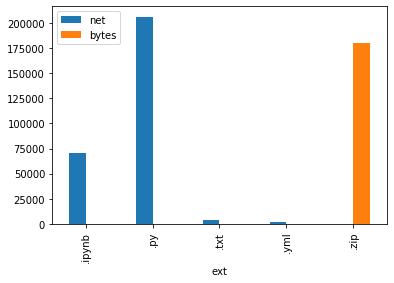

In [24]:
gr.plot(kind="bar");